In [1]:
import pandas as pd
import numpy as np

### MovieLens Dataset [(Source)](https://github.com/krishnaik06/Movie-Recommender-in-python)

In [2]:
cols = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data.csv', sep = '\t', names = cols)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_titles = pd.read_csv('movie_id_titles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
df = pd.merge(df, movie_titles, on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## EDA

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [7]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [8]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [9]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [10]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


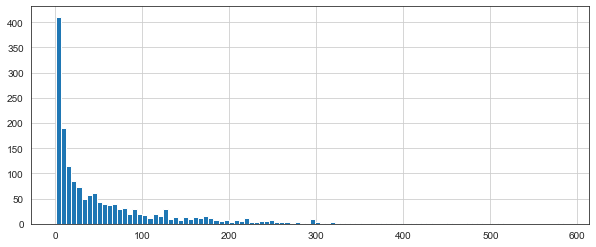

In [11]:
plt.figure(figsize = (10, 4))
ratings['num of ratings'].hist(bins = 100)

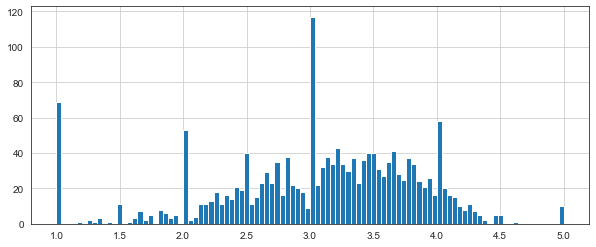

In [12]:
plt.figure(figsize = (10, 4))
ratings['rating'].hist(bins = 100)

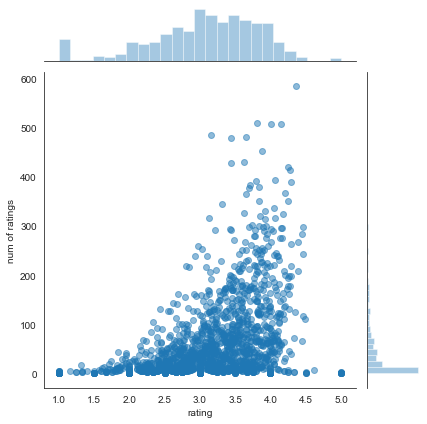

In [13]:
sns.jointplot(x = 'rating', y = 'num of ratings', data = ratings, alpha = 0.5)

### Recommendation (Using Correlation)

In [14]:
movie_matrix = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ratings.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [16]:
movie_user_rating = movie_matrix['Godfather, The (1972)']
movie_user_rating.head()

user_id
0    NaN
1    5.0
2    5.0
3    NaN
4    NaN
Name: Godfather, The (1972), dtype: float64

In [17]:
similar_to_movie = movie_matrix.corrwith(movie_user_rating)

C:\Users\shiva\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\shiva\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [18]:
movie_corr = pd.DataFrame(similar_to_movie, columns = ['Correlation'])
movie_corr.head()

,Correlation
title,
'Til There Was You (1997),0.612372
1-900 (1994),-0.471405
101 Dalmatians (1996),0.084183
12 Angry Men (1957),0.034258
187 (1997),0.467335


In [19]:
movie_corr.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Dark City (1998),1.0
8 Seconds (1994),1.0
Talking About Sex (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Bye Bye, Love (1995)",1.0
"Locusts, The (1997)",1.0
Kicked in the Head (1997),1.0
"Outlaw, The (1943)",1.0
"Beans of Egypt, Maine, The (1994)",1.0


As we can observe that the co-related movies/recommended movies are not really making sense. This is because there are a lot of movies rated by just one user(who also watched star wars), and which is hence showed as 1.0 as their overall rating.

In [20]:
movie_corr = movie_corr.join(ratings['num of ratings'])
movie_corr.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.612372,9
1-900 (1994),-0.471405,5
101 Dalmatians (1996),0.084183,109
12 Angry Men (1957),0.034258,125
187 (1997),0.467335,41


In [21]:
movie_corr[movie_corr['num of ratings'] > 100].sort_values('Correlation', ascending = False).head(10)

,Correlation,num of ratings
title,,
"Godfather, The (1972)",1.000000,413
"Godfather: Part II, The (1974)",0.683862,209
GoodFellas (1990),0.421477,226
"People vs. Larry Flynt, The (1996)",0.393439,215
Bonnie and Clyde (1967),0.386226,122
Chinatown (1974),0.376133,147
Apocalypse Now (1979),0.374378,221
Some Like It Hot (1959),0.366085,128
Dead Man Walking (1995),0.360525,299
